In [2]:
import pandas as pd
import statsmodels.api as sm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
milk = pd.read_csv("monthly-milk-production.csv", sep=";", index_col=['month'], parse_dates=['month'], dayfirst=True)
milk.columns

Index([u'milk'], dtype='object')

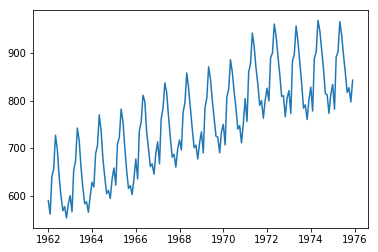

In [4]:
pylab.plot(milk)

In [5]:
print round(sm.tsa.stattools.adfuller(milk["milk"].values)[1],2)
# ??sm.tsa.stattools.adfuller(milk["milk"].values)
sm.tsa.stattools.adfuller(milk["milk"].values)

0.63


(-1.3038115874221265,
 0.627426708603033,
 13,
 154,
 {'1%': -3.473542528196209,
  '10%': -2.576878053634677,
  '5%': -2.880497674144038},
 1115.1730447395112)

In [6]:
milk["month_smoothed"] = map(lambda a,m : a/m , milk["milk"].values, milk.index.days_in_month)

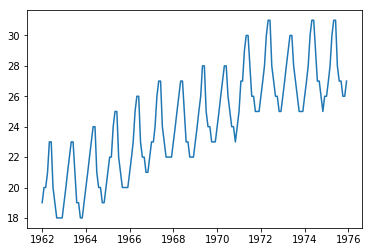

In [7]:
pylab.plot(milk["month_smoothed"])

In [31]:
milk["month_smoothed"].sum()
milk["dayly_diff1"] = milk.milk - milk.milk.shift(1)

In [53]:
milk["dayly_diff12"] = milk.milk - milk.milk.shift(12)
milk["dayly_diff12_"] = milk.dayly_diff1 - milk.milk.shift(12)

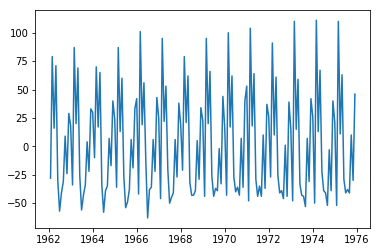

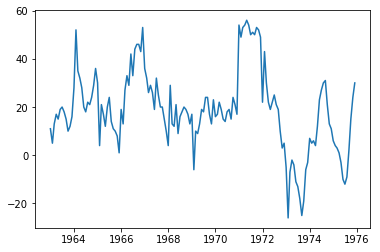

In [47]:
pylab.plot(milk["dayly_diff1"])
pylab.show()
pylab.plot(milk["dayly_diff12"])

In [50]:
sm.tsa.adfuller(milk["milk"].dropna())

(-1.3038115874221265,
 0.627426708603033,
 13,
 154,
 {'1%': -3.473542528196209,
  '10%': -2.576878053634677,
  '5%': -2.880497674144038},
 1115.1730447395112)

In [48]:
sm.tsa.adfuller(milk["dayly_diff1"].dropna())

(-3.054995558653047,
 0.030068004001787604,
 14,
 152,
 {'1%': -3.474120870218417,
  '10%': -2.5770126333102494,
  '5%': -2.880749791423677},
 1107.6745114331072)

In [58]:
# ??sm.tsa.adfuller
print sm.tsa.adfuller(milk["dayly_diff12"].dropna())

print sm.tsa.adfuller(milk["dayly_diff12_"].dropna())

(-2.3354193143593966, 0.16079880527711388, 12, 143, {'5%': -2.8819726324025625, '1%': -3.4769274060112707, '10%': -2.577665408088415}, 983.7689056486297)
(-1.348497853941475, 0.6067030102501079, 14, 141, {'5%': -2.882265832283648, '1%': -3.4776006742422374, '10%': -2.5778219289774156}, 1180.672102063831)


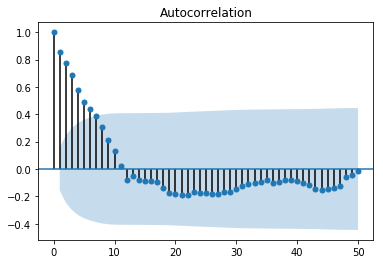

In [63]:
sm.graphics.tsa.plot_acf(milk["dayly_diff12"].dropna().values.squeeze(), lags=50)
plt.show()
# Q approx

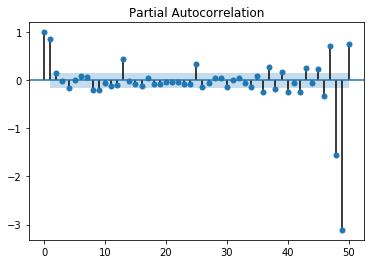

In [65]:
sm.graphics.tsa.plot_pacf(milk["dayly_diff12"].dropna().values.squeeze(), lags=50)
plt.show()
# partial autocorrelation